In [1]:
# Imports globales

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
87,17.908130,5.011419,4.280182,-1.000000,-1.000000,-12.175000,0.279163,57.44358,8.802609,LEFT_ACCELERATE
88,18.690660,4.610378,3.760737,-1.000000,-1.000000,-13.659610,0.279164,57.65280,8.903328,LEFT_ACCELERATE
89,17.474800,4.513628,3.668613,-1.000000,-1.000000,-15.092470,0.279161,57.83345,9.000292,ACCELERATE
90,16.079550,4.460663,3.618864,-1.000000,-1.000000,-16.593550,0.279161,58.03268,9.101952,LEFT_ACCELERATE
91,16.126660,3.206959,2.499199,-1.000000,-1.000000,-18.058820,0.279163,58.18198,9.200894,LEFT_ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
12615,11.836230,-1.000000,-1.000000,2.450530,1.934736,-10.084570,0.279162,-45.71747,19.001990,ACCELERATE
12616,10.376820,-1.000000,-1.000000,2.249434,1.776213,-8.587298,0.279161,-45.87234,19.103050,ACCELERATE
12617,8.979159,-1.000000,-1.000000,2.049980,1.616839,-7.127993,0.279160,-46.02808,19.201580,LEFT_ACCELERATE
12618,8.702519,-1.000000,-1.000000,2.017563,1.531392,-5.636408,0.279163,-46.14282,19.302070,LEFT_ACCELERATE


Index(['ACCELERATE', 'LEFT_ACCELERATE', 'RIGHT_ACCELERATE'], dtype='object')


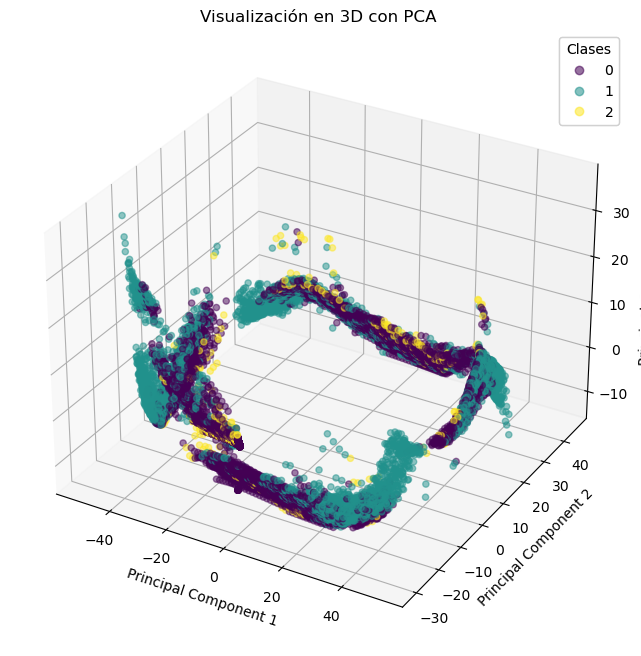

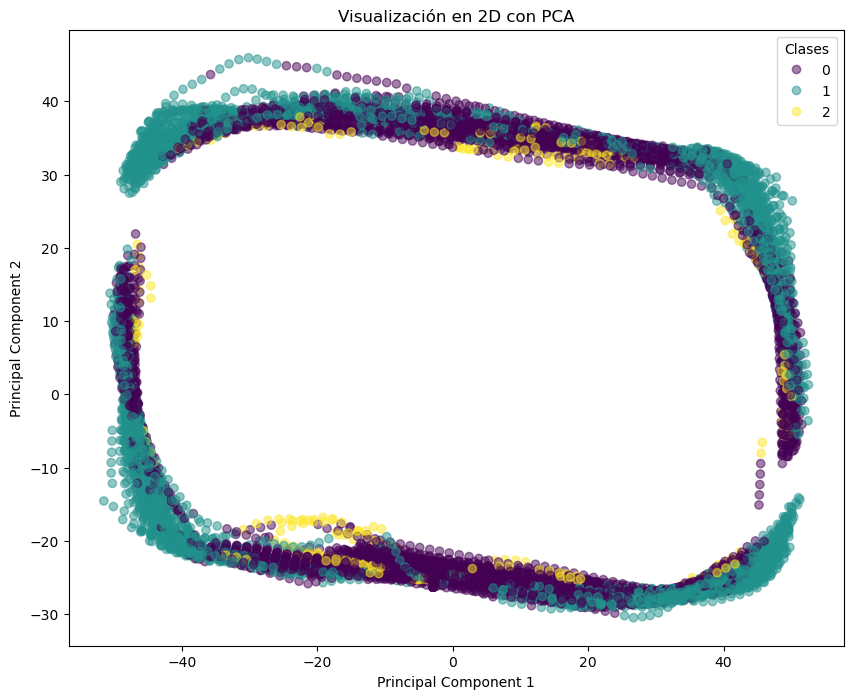

           ray1      ray2      ray3      ray4      ray5     kartx     karty  \
0      49.03510  6.521043  4.611090  6.489725  4.588912  15.98893  0.275615   
1      26.52792  6.520910  4.611073  6.489857  4.588929  15.98893  0.275707   
2      26.49496  6.520908  4.611071  6.489859  4.588931  15.98893  0.275722   
3      26.48998  6.520906  4.611070  6.489861  4.588932  15.98893  0.275725   
4      26.48590  6.520902  4.611067  6.489864  4.588934  15.98893  0.275744   
...         ...       ...       ...       ...       ...       ...       ...   
12661  24.57170  5.960901  4.295493  7.073489  4.906185  16.30633  0.279159   
12662  24.57090  5.922115  4.267509  7.113773  4.934168  16.33436  0.279160   
12663  24.57171  5.883925  4.239944  7.153432  4.961732  16.36193  0.279160   
12664  24.57126  5.845483  4.212191  7.193349  4.989481  16.38992  0.279160   
12665  24.57105  5.805372  4.183229  7.234997  5.018442  16.41868  0.279160   

           kartz       time      action  
0       3

In [4]:
import glob
import os

path = "dataset/raw/"

all_files = glob.glob(os.path.join(path , "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

#Excluir acciones en las que no se hace nada
df = df[df['action'] != 'NONE']

#buscamos los valores -1 para quitarlos
mask = df.applymap(lambda x:  x == -1)
display(df[mask.any(axis=1)])
df = df.drop(df[mask.any(axis=1)].index)

#En vez de hacer esto, quitarlos da mejores resultados al entrenar los modelos
#df["ray1"] = df["ray1"].replace(-1, 1000)
#df["ray2"] = df["ray2"].replace(-1, 1000)
#df["ray3"] = df["ray3"].replace(-1, 1000)
#df["ray4"] = df["ray4"].replace(-1, 1000)
#df["ray5"] = df["ray5"].replace(-1, 1000)

# Seleccionar todas las columnas como características
X = df.drop('action', axis=1)  # Excluir la columna 'action' si es la etiqueta/clase

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Asignar colores numéricos a cada clase
class_colors, class_labels = pd.factorize(df['action'])

print(class_labels)

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un gráfico bidimensional
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualización en 2D con PCA')

# Leyenda
plt.legend(*scatter.legend_elements(), title='Clases')

plt.show()

print(df)

In [ ]:
import json

#quitamos la y porque no aporta nada
X = X.drop("karty", axis=1)

# Normalizar
scaling = StandardScaler()
scaling.fit(X)
X = scaling.transform(X)

params = {
    'mean': scaling.mean_.tolist(),
    'std': scaling.scale_.tolist()
}

with open('dataset/normalized/scaler_params.json', 'w') as file:
    json.dump(params, file)

print(scaling.mean_)
print()
print(scaling.scale_)
print()

# Exportar, de nuevo con acciones
actions = df["action"].reset_index()
out = pd.DataFrame(X)
actions.reset_index()
out.reset_index()
out = pd.concat([out, actions], axis=1)
out = out.drop('index', axis=1)

print(out)
out.to_csv('dataset/normalized/kart.csv', index=False, header=["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz", "time", "action"])

pca = PCA(n_components=3)
X_pca = pca.fit_transform(out.drop('action', axis=1))

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()

In [2]:
#Cargar dataset

path = "dataset/normalized/"

df = pd.read_csv(path + "kart.csv")

# Split the data into features (X) and target (y)
X = df.drop('action', axis=1)
y = df['action']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

G:\2Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


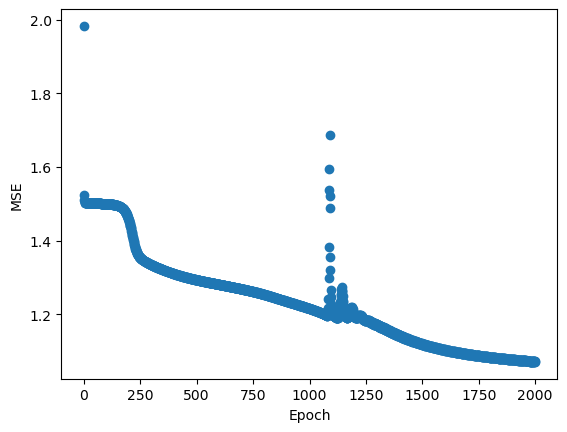

Accuracy: 0.7702510658455708
Precision: 0.7440815257433001
Recall: 0.7702510658455708

Confusion Matrix:
[[1035  237    0]
 [ 168  591    0]
 [  63   17    0]]


G:\2Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# MLP implementado por nosotros
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ann

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Número de clases
num_classes = 3

# Crear una instancia del OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')

# Ajustar y transformar los datos de entrenamiento
y_train_onehot = encoder.fit_transform(y_train_encoded.reshape(-1, 1))

epsilon0 = -0.12
epsilon1 = 0.12

#escalado de rangos (https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range)
theta1 = np.random.rand(25, 9) * (epsilon1 - epsilon0) + epsilon0
theta2 = np.random.rand(15, 26) * (epsilon1 - epsilon0) + epsilon0
theta3 = np.random.rand(3, 16) * (epsilon1 - epsilon0) + epsilon0
thetas = [theta1, theta2, theta3]

lambda_ = 1
alpha = 1
epochs = 2000
history, thetas = ann.gradient_descent(X_train, y_train_onehot, alpha, epochs, thetas, lambda_)

scatter = plt.scatter(x = range(epochs), y = history, marker = 'o')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

activations = ann.predict(thetas, X_test)

pred = np.argmax(activations[len(activations) - 1], axis = 1)


accuracy = accuracy_score(y_test_encoded, pred)
precision = precision_score(y_test_encoded, pred, average='weighted')
recall = recall_score(y_test_encoded, pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

In [6]:
# MLP de SKLearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear una instancia del OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')

# Ajustar y transformar los datos de entrenamiento
y_train_onehot = encoder.fit_transform(y_train_encoded.reshape(-1, 1))

classifier = MLPClassifier(hidden_layer_sizes=(25, 15), 
                           max_iter=epochs, activation='logistic', solver='sgd', alpha=1, learning_rate_init=1, epsilon=0.12)

classifier.fit(X_train, y_train_onehot)

#metricas
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

G:\2Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6347702510658456
Precision: 0.6303802362040088
Recall: 0.6347702510658456

Confusion Matrix:
[[1229   43    0]
 [ 648  111    0]
 [  75    5    0]]


G:\2Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# MLP de SKLearn, cambiando parametros
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear una instancia del OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')

# Ajustar y transformar los datos de entrenamiento
y_train_onehot = encoder.fit_transform(y_train_encoded.reshape(-1, 1))
epochs = 4000

# Con LBFGS, Logistic
classifier_logistic = MLPClassifier(hidden_layer_sizes=(25, 15), 
                           max_iter=epochs, activation='logistic', solver='lbfgs', alpha=1, learning_rate_init=1, epsilon=0.12)

classifier_logistic.fit(X_train, y_train_onehot)

#metricas
y_pred = classifier_logistic.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print("LBFGS, Logistic Implementation:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)


#Con LBFGS, Relu
classifier_relu = MLPClassifier(hidden_layer_sizes=(25, 15), 
                           max_iter=epochs, activation='relu', solver='lbfgs', alpha=1, learning_rate_init=1, epsilon=0.12)

classifier_relu.fit(X_train, y_train_onehot)

#metricas
y_pred = classifier_relu.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print("\n\nLBFGS, Relu Implementation:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

G:\2Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
G:\2Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


LBFGS, Logistic Implementation:

Accuracy: 0.8370440549502606
Precision: 0.8348750165401255
Recall: 0.8370440549502606

Confusion Matrix:
[[1153  116    3]
 [ 162  594    3]
 [  53    7   20]]


LBFGS, Relu Implementation:

Accuracy: 0.8034107058266224
Precision: 0.8004986073643364
Recall: 0.8034107058266224

Confusion Matrix:
[[1132  133    7]
 [ 214  543    2]
 [  55    4   21]]


G:\2Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [16]:
import Utils

Utils.ExportAllformatsMLPSKlearn(classifier_logistic, X, 'fileName.pickle', 'fileName.onnx', 'fileName.JSON', 'fileName.custom')

ModuleNotFoundError: No module named 'skl2onnx'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("\nKNN")
print("------------------------------------")

#cross validation para encontrar el mejor valor de k
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

#knn with k=12, que es el mejor
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

#metricas
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.svm import SVC

print("\nSVM")
print("------------------------------------")

# Cross-validation para encontrar el mejor kernel
kernel_values = ["linear", "poly", "rbf", "sigmoid"]
scores = []

for kernel in kernel_values:
    clf = SVC(kernel=kernel)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x=kernel_values, y=scores, marker='o')
plt.xlabel("Kernel")
plt.ylabel("Accuracy Score")
plt.show()

# Entrenamiento del clasificador con el mejor kernel
best_kernel = kernel_values[np.argmax(scores)]
clf = SVC(kernel=best_kernel)
clf.fit(X_train, y_train)

# Metricas
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\nDecisionTree")
print("------------------------------------")

# Cross validation para encontrar cual es el mejor criterio
criterion_values = ["gini", "entropy", "log_loss"]
scores = []
for criterion in criterion_values:
    clf = DecisionTreeClassifier(criterion=criterion)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x=criterion_values, y=scores, marker='o')
plt.xlabel("Criterion")
plt.ylabel("Accuracy Score")
plt.show()

clf = DecisionTreeClassifier(criterion=criterion_values[np.argmax(scores)])
clf = clf.fit(X_train,y_train)

# Metricas
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
import json

# Guardar los atributos del arbol en un diccionario
tree_structure = {
    'n_nodes': clf.tree_.node_count,
    'children_left': clf.tree_.children_left.tolist(),
    'children_right': clf.tree_.children_right.tolist(),
    'feature': clf.tree_.feature.tolist(),
    'threshold': clf.tree_.threshold.tolist(),
    'values': clf.tree_.value.tolist(),
}

with open('decision_tree_structure.json', 'w') as file:
    json.dump(tree_structure, file)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Buscamos los mejores hiperparametros para el Random Forest usando RandomizedSearchCV
# Este proceso es muy largo y no deberia hacerse todo el rato

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\nRandomForest")
print("------------------------------------")

#obtenidos con RandomizedSearchCV
rf = RandomForestClassifier(max_depth=19, n_estimators=265)
rf.fit(X_train, y_train)

# Metricas
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.preprocessing import LabelEncoder

import sys
!conda install --yes --prefix {sys.prefix} tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Recurrent Neural Network con una capa LSTM

# Ya que el entrenamiento es largo es posible guardar la red y simplemente probar sus metricas
# Si train es False intentara cargar una red entrenada previamente
train = False

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Número de clases
num_classes = 3

# Convertir a codificación one-hot para usar MSE
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes, dtype='float32')

if (train):
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Métrica a monitorear (puede ser 'val_accuracy', 'val_loss', etc.)
        patience=10,          # Número de épocas sin mejora antes de detener el entrenamiento
        restore_best_weights=True  # Restaura los pesos del modelo al mejor logrado durante el entrenamiento
    )

    model = keras.Sequential()

    model.add(layers.Dense(64, activation='relu', input_shape=(8,)))

    # Agrega una capa de Reshape para agregar la dimensión de los pasos de tiempo
    model.add(layers.Reshape((1, 64)))

    # Capa LSTM
    model.add(layers.LSTM(64))

    # Capa de salida
    model.add(layers.Dense(num_classes, activation='linear'))

    model.summary()

    model.compile(
        loss=keras.losses.MeanSquaredError(),
        optimizer="sgd",
        metrics=["accuracy"],
    )

    history = model.fit(
        X_train,
        y_train,
        batch_size=16,
        epochs=5000,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
    )

    # Guardar el modelo en formato keras
    model.save('rnn_entrenado.keras')
    
else:
    from tensorflow.keras.models import load_model
    
    model = load_model('rnn_entrenado.keras')
    

y_pred = model.predict(X_test)

predicted_classes = y_pred.argmax(axis=1)

accuracy = accuracy_score(y_test_encoded, predicted_classes)
precision = precision_score(y_test_encoded, predicted_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_encoded, predicted_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, predicted_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)